In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import wrangle as w
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans

from pydataset import data

In [2]:
# ACQ

df = data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
# PREP

In [4]:
new_col_name = []

for col in df.columns:
    new_col_name.append(col.lower().replace('.', '_'))

df.columns = new_col_name

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [5]:
#didn't split because dataset is so small

In [6]:
X = df[['sepal_width', 'petal_width']]
X.head()

,sepal_width,petal_width
1,3.5,0.2
2,3.0,0.2
3,3.2,0.2
4,3.1,0.2
5,3.6,0.2


In [7]:
#Create and fit the cluster model

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans.predict(X)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [8]:
#Made a column named cluster in both the iris df and X df

df['cluster'] = kmeans.predict(X)

X['cluster'] = kmeans.predict(X)

df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1


In [9]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,cluster
species,,,,,
setosa,5.006,3.428,1.462,0.246,1.02
versicolor,5.936,2.770,4.260,1.326,1.84
virginica,6.588,2.974,5.552,2.026,0.24


In [10]:
kmeans.cluster_centers_

array([[3.04166667, 2.05208333],
       [3.45102041, 0.24489796],
       [2.70754717, 1.30943396]])

In [11]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns[:2])
centroids

,sepal_width,petal_width
0,3.041667,2.052083
1,3.451020,0.244898
2,2.707547,1.309434


In [12]:
df.groupby('cluster')['sepal_width', 'sepal_width'].mean()

,sepal_width,sepal_width
cluster,,
0,3.041667,3.041667
1,3.451020,3.451020
2,2.707547,2.707547


In [13]:
df['cluster'] = 'cluster_' + df.cluster.astype(str)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,cluster_1
2,4.9,3.0,1.4,0.2,setosa,cluster_1
3,4.7,3.2,1.3,0.2,setosa,cluster_1
4,4.6,3.1,1.5,0.2,setosa,cluster_1
5,5.0,3.6,1.4,0.2,setosa,cluster_1


<Figure size 1400x900 with 0 Axes>

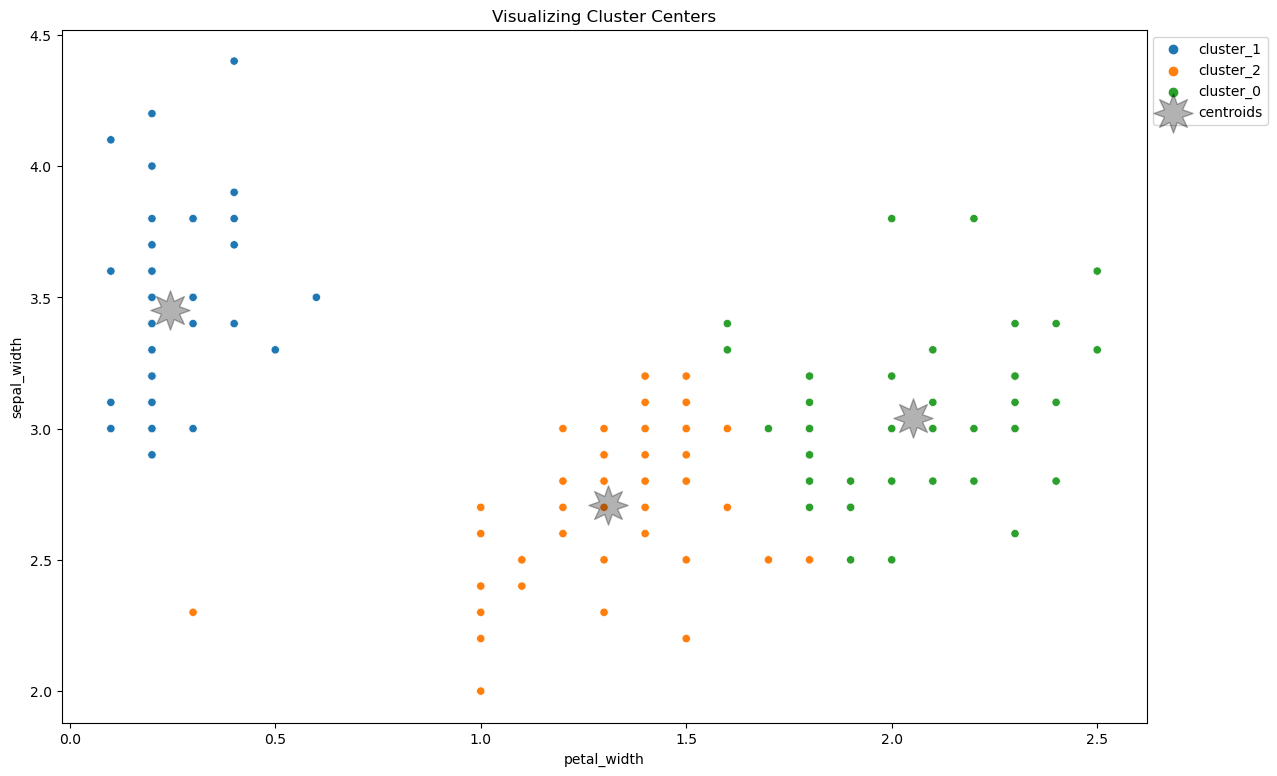

In [14]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))
plt.figure(figsize=(14, 9))


# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_width', y = 'sepal_width', data = df, hue = 'cluster')


# plot cluster centers (centroids)
centroids.plot.scatter(x = 'petal_width', y = 'sepal_width', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = (8,1,0), label = 'centroids')

plt.title('Visualizing Cluster Centers')

# Get unique cluster labels
unique_clusters = df['cluster'].unique()

# Create legend labels for clusters
cluster_labels = [f'Cluster {cluster}' for cluster in unique_clusters]

plt.legend(bbox_to_anchor=(1, 1), loc='upper left');


In [15]:
df_m = w.get_mall_data()

csv file found and loaded


In [16]:
# Peak into data

df_m.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
df_m.shape

(200, 5)

In [18]:
dummy_df = pd.get_dummies(df_m['gender'])
df_m = pd.concat([df_m, dummy_df], axis=1)

In [19]:
df_m.head()

,customer_id,gender,age,annual_income,spending_score,Female,Male
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,1
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,0


In [20]:
X = df_m[['age', 'annual_income', 'Female', 'Male']]


In [21]:
kmeans = KMeans(n_clusters=17)
kmeans.fit(X)
kmeans.predict(X)

array([ 5,  5,  5,  5,  5,  5,  1,  5, 12,  5, 12,  1, 12,  5,  1,  5,  1,
        5, 12,  1,  1,  5,  1,  1, 12,  1,  1,  1,  1, 13, 12, 13,  6, 13,
        6, 13,  1,  4,  4, 13,  9, 13,  6,  4,  6, 13,  6,  4,  4,  4,  6,
        4,  4,  9,  6,  6,  6,  9,  4,  6,  9, 13,  9,  6,  9, 11,  6,  9,
       11,  4,  9,  6,  9,  9,  9, 11, 10, 10, 11, 10,  9, 10,  9, 10, 11,
       10, 10, 11, 11, 10,  3, 11, 10, 10, 11, 11, 10, 11, 10, 11, 11, 10,
        3, 11, 10, 11,  3, 10,  3,  3,  3, 11, 10, 11, 11, 11,  3, 10, 10,
       10,  0, 16, 16, 16,  0,  0, 16, 16,  3, 16, 16, 16,  0,  0,  0,  0,
       16,  0,  0,  0,  3,  0,  0,  0,  0,  0, 16,  0,  0,  0, 16, 16, 16,
       16, 16,  0, 16,  0,  0,  0,  8,  0,  0,  0,  8,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  8,  7,  8,  7,  8,  7, 14, 14,  8, 14, 14, 14,  8,
       14, 14, 14, 14, 14,  2,  2,  2,  2,  2, 15, 15, 15], dtype=int32)

In [22]:
#Add column for cluster
df_m['cluster'] = kmeans.predict(X)

X['cluster'] = kmeans.predict(X)

df_m.head(3)

,customer_id,gender,age,annual_income,spending_score,Female,Male,cluster
0,1,Male,19,15,39,0,1,5
1,2,Male,21,15,81,0,1,5
2,3,Female,20,16,6,1,0,5


In [23]:
X.head()

,age,annual_income,Female,Male,cluster
0,19,15,0,1,5
1,21,15,0,1,5
2,20,16,1,0,5
3,23,16,1,0,5
4,31,17,1,0,5


In [24]:
df_m.groupby('spending_score').mean()

,customer_id,age,annual_income,Female,Male,cluster
spending_score,,,,,,
1,158.000000,35.500000,78.000000,0.000000,1.000000,8.000000
3,9.000000,64.000000,19.000000,0.000000,1.000000,12.000000
4,32.000000,56.500000,31.500000,0.000000,1.000000,9.000000
5,115.500000,35.500000,63.500000,0.500000,0.500000,1.000000
6,5.000000,27.500000,17.000000,1.000000,0.000000,3.000000
7,137.000000,44.000000,73.000000,1.000000,0.000000,16.000000
8,193.000000,33.000000,113.000000,0.000000,1.000000,2.000000
9,131.000000,47.000000,71.000000,0.000000,1.000000,16.000000
10,156.000000,27.500000,80.500000,0.000000,1.000000,3.500000


In [25]:
kmeans.inertia_

7184.931435319067

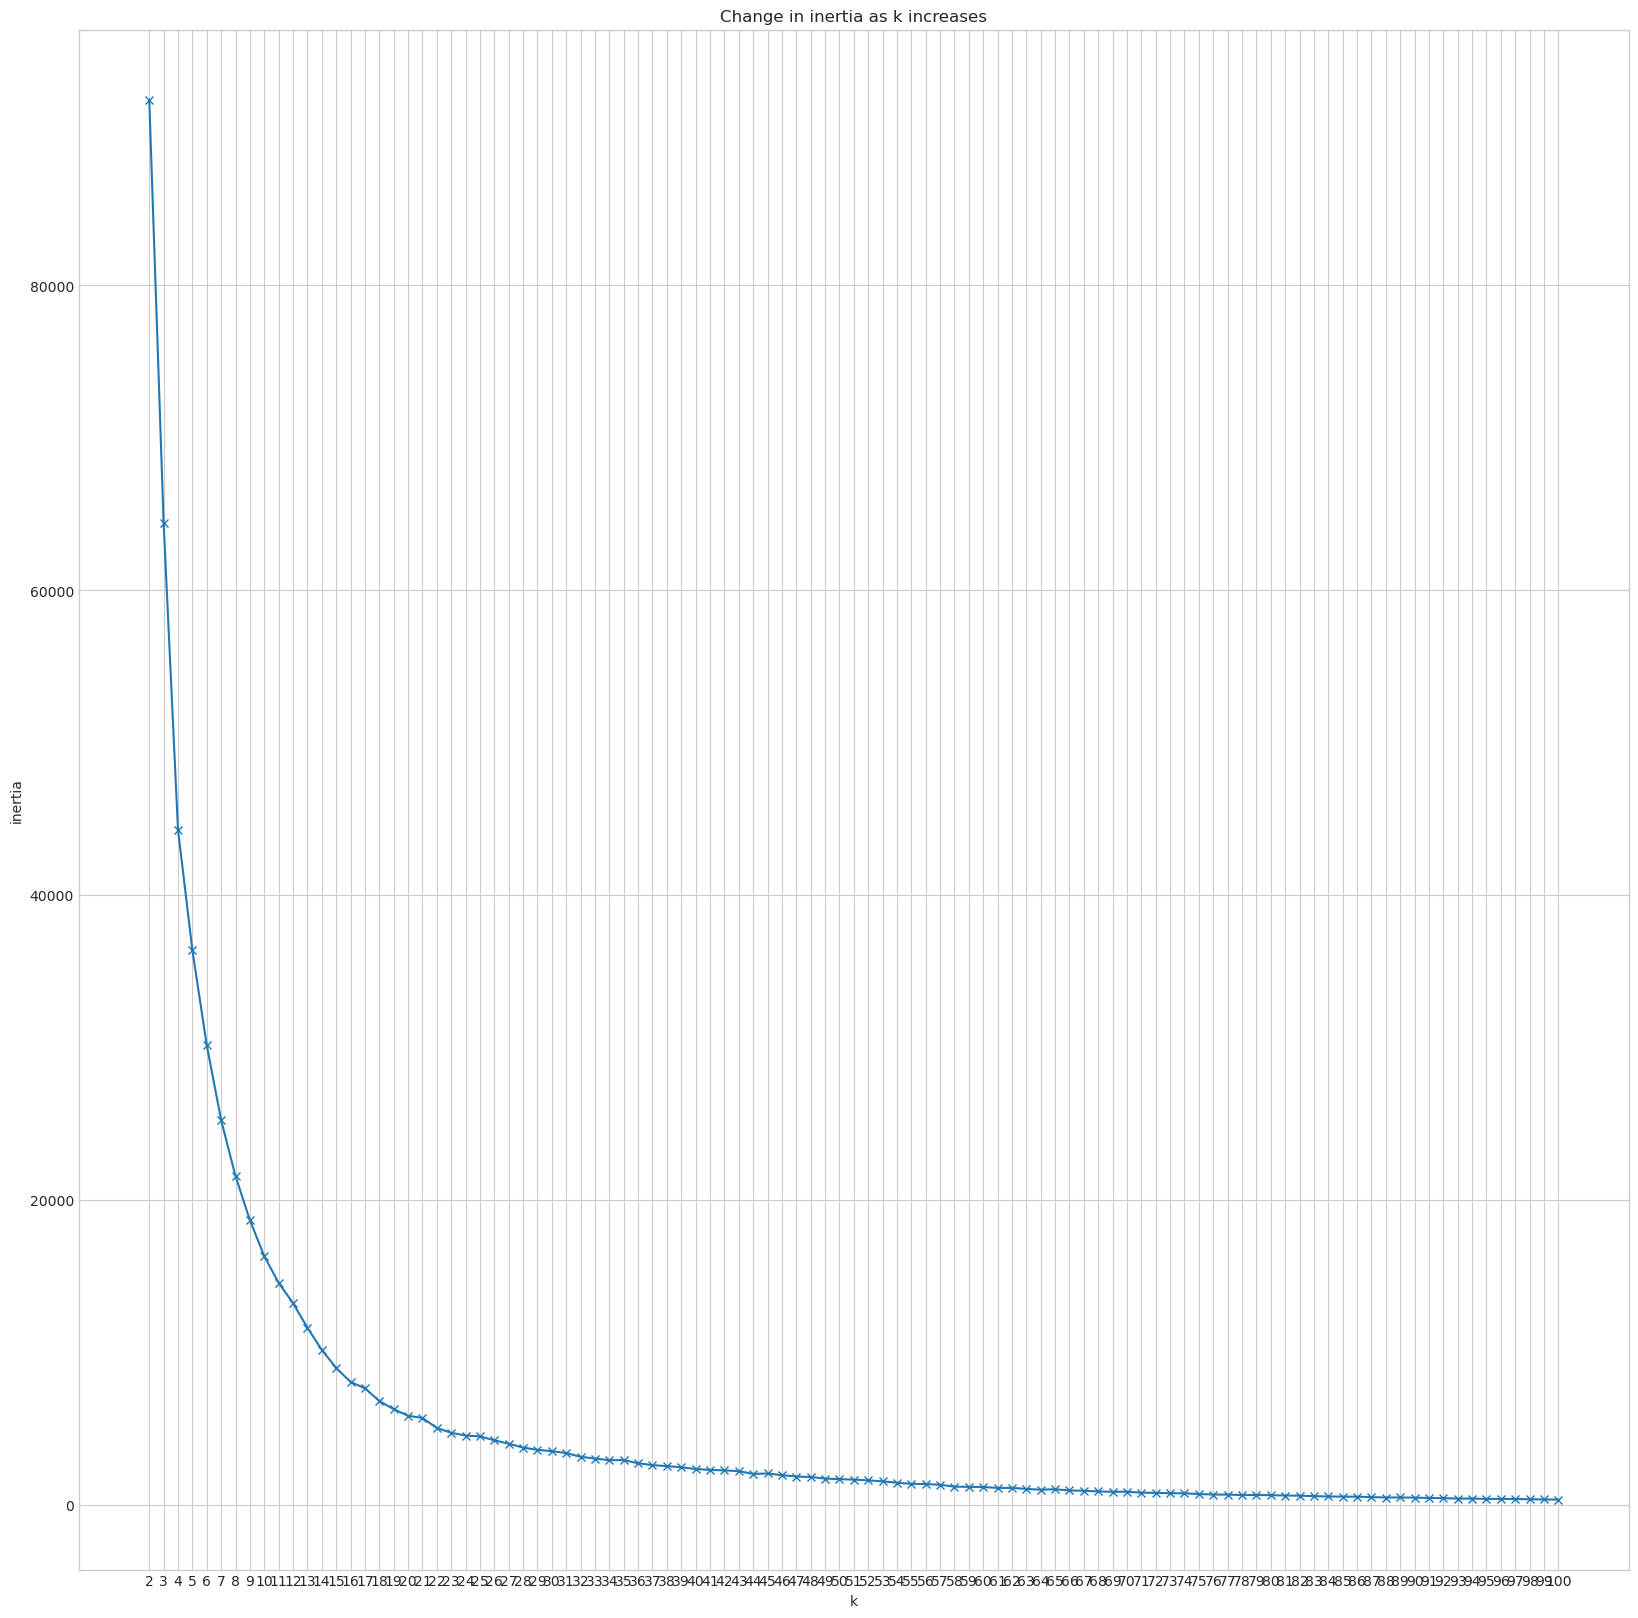

In [26]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(20, 20))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 101)}).plot(marker='x')
    plt.xticks(range(2, 101))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

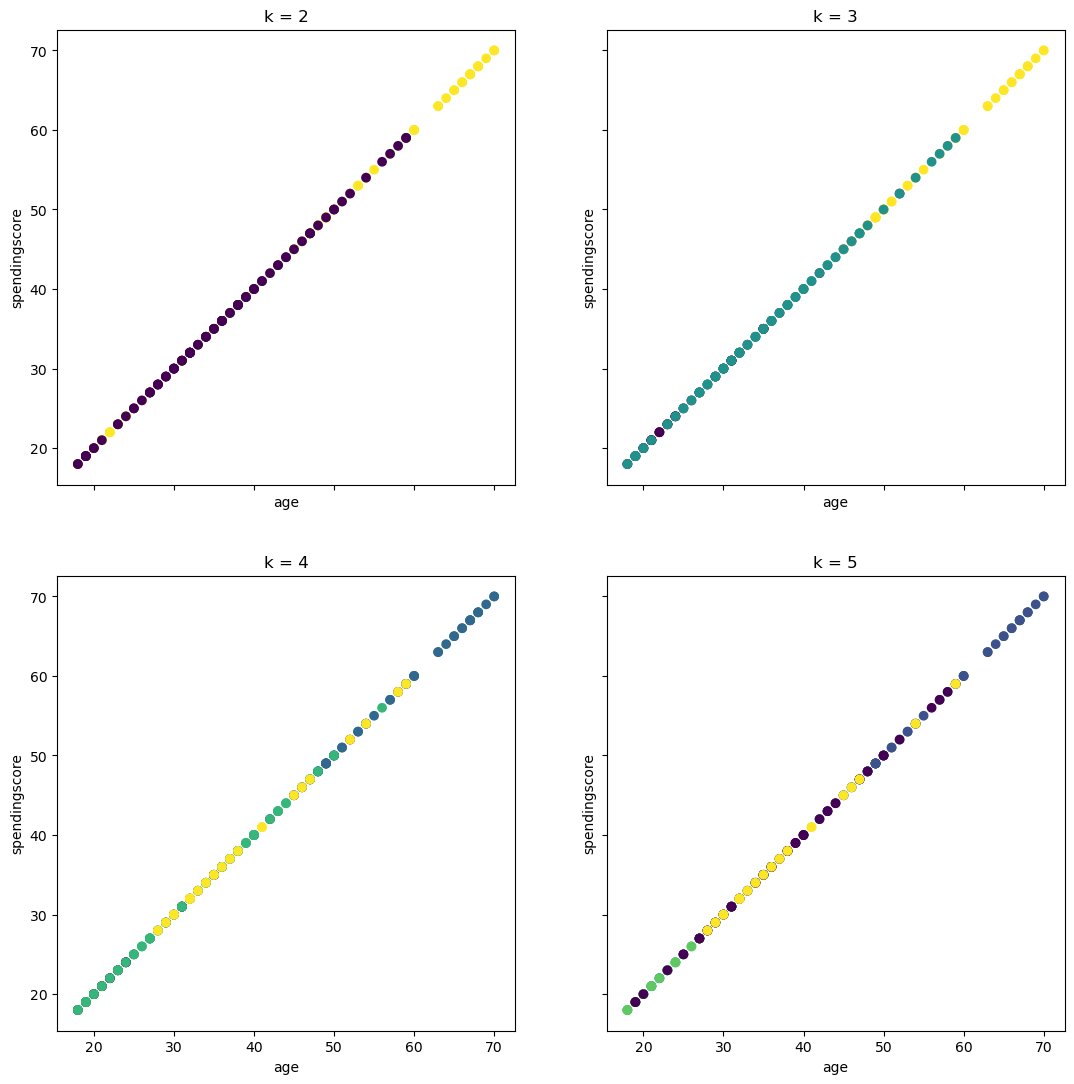

In [27]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    
    clusters = KMeans(k).fit(X).predict(X)
    
    ax.scatter(X.age, X.age, c=clusters)
    
    ax.set(title='k = {}'.format(k), xlabel='age', ylabel='spendingscore')

In [28]:
cols = ['age', 'annual_income', 'Female', 'Male']

# making my scaler object
scaler = StandardScaler()

# calling my fit_transform (note i dont have a train/test)
# reassign those transformed values back into the dataframe
df_m[cols] = scaler.fit_transform(df_m[cols])

In [29]:
df_m.head()

,customer_id,gender,age,annual_income,spending_score,Female,Male,cluster
0,1,Male,-1.424569,-1.738999,39,-1.128152,1.128152,5
1,2,Male,-1.281035,-1.738999,81,-1.128152,1.128152,5
2,3,Female,-1.352802,-1.700830,6,0.886405,-0.886405,5
3,4,Female,-1.137502,-1.700830,77,0.886405,-0.886405,5
4,5,Female,-0.563369,-1.662660,40,0.886405,-0.886405,5


In [30]:
X = df_m[['age', 'annual_income', 'Female', 'Male']]


In [31]:
kmeans = KMeans(n_clusters=17)
kmeans.fit(X)
kmeans.predict(X)

array([ 6,  6,  9,  9, 15,  9, 15,  9, 14, 15, 14, 15,  8,  9,  6,  6, 15,
        6, 14, 15,  6,  6,  8,  6,  8,  6,  8,  6, 15,  9, 14,  9, 14,  6,
        8,  9,  8, 15, 15,  9, 16,  6,  2, 15,  8,  9,  8, 15, 15, 15,  8,
        6, 15,  5,  8,  2,  8,  5,  0,  2,  5, 11, 16,  8,  5, 11,  8, 16,
       11, 15,  5,  8, 16, 16,  5, 11,  8,  2,  0,  8,  5,  2,  5,  8,  0,
        2, 16,  0,  7,  3, 16, 11,  2,  7,  7, 11,  3,  0,  2, 11,  0,  3,
        5, 11,  2,  0, 16,  2,  5,  5,  5,  0,  7, 11,  0,  0, 16,  3,  3,
        3, 11,  7,  7, 13,  0,  7, 13, 13,  5, 13,  2, 13,  0,  7,  1,  7,
        3, 13,  1,  7,  3, 13,  7,  7,  1,  1, 10,  7,  7, 13, 13, 13,  3,
        7,  3,  7, 13,  7, 13,  7,  3,  7,  1,  7, 10,  7, 13,  7,  7,  1,
       13,  1, 13, 13,  3,  7, 10,  1, 10, 13,  4,  4, 10,  4,  4,  1,  3,
        1,  4,  4,  4,  4, 12,  4,  4,  4,  4, 12, 12, 12], dtype=int32)

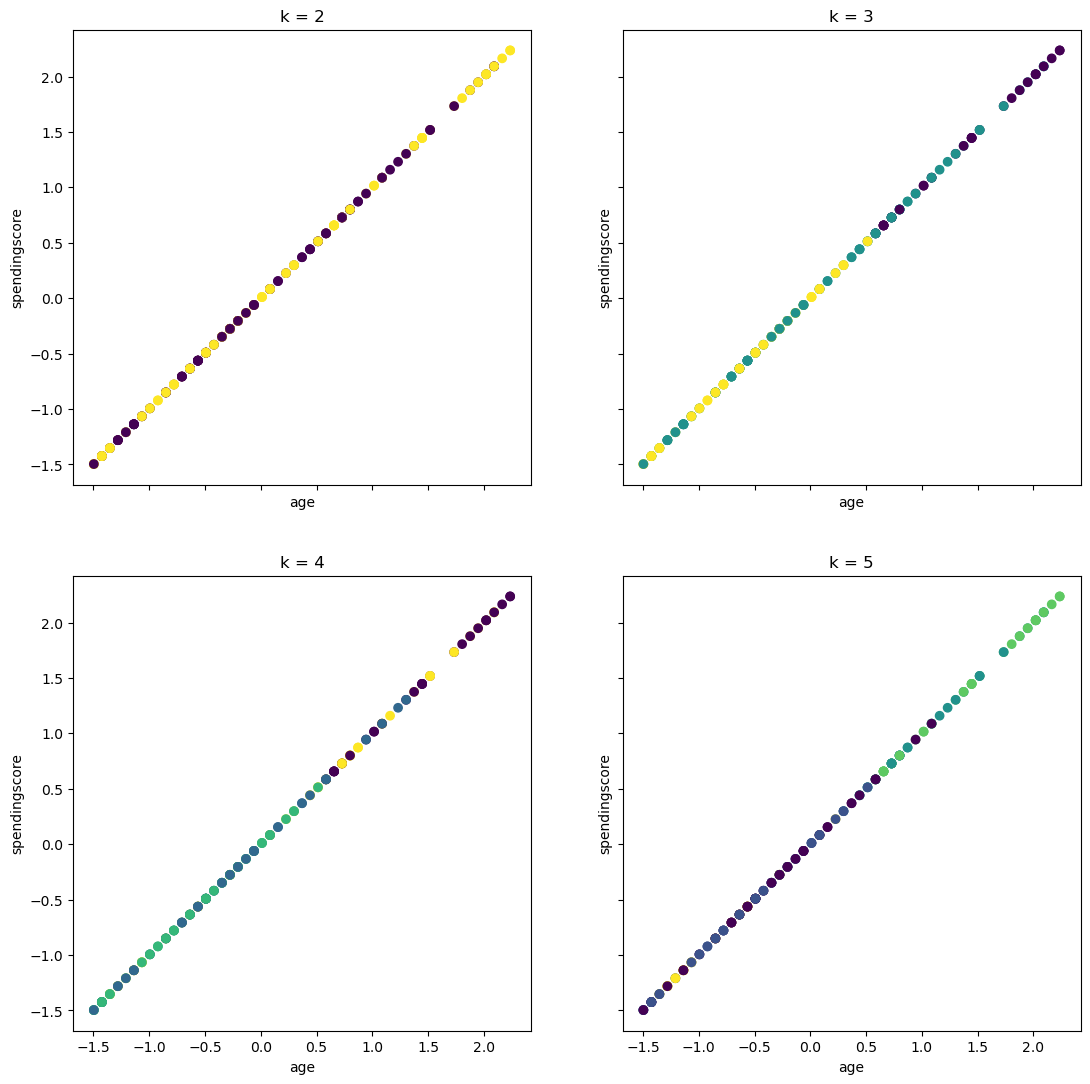

In [32]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    
    clusters = KMeans(k).fit(X).predict(X)
    
    ax.scatter(X.age, X.age, c=clusters)
    
    ax.set(title='k = {}'.format(k), xlabel='age', ylabel='spendingscore')

In [ ]:
distributions changed

### Bonuses